<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>Inferência Estatística (GCC1625) - Trabalho 3</center></h1>

- Nome completo: Erich Johann
- [Link Vídeo]()


# 1 Correlação e covariância
 Você é analista de dados de uma empresa de educação. Foram coletadas infor
mações sobre os seguintes atributos de alunos de um curso online:

 • horas_estudo: número de horas que o aluno estudou na semana;

 • nota_final: nota final no curso (0 a 100).

 Seu objetivo é investigar a relação entre essas duas variáveis. Use os dados
 simulados gerados pelo código abaixo.

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(42)
horas_estudo = np.random.normal(10, 2, 30)
nota_final = 50 + 4 * horas_estudo + np.random.normal(0, 5,30)
df = pd.DataFrame({
 'Horas de Estudo': horas_estudo,
 'Nota Final': nota_final
})

### 1.1 Cálculo Manual
 1. Calcule a média de cada variável;
 2. Calcule a covariância amostral:
 $$ Cov(X,Y) = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$$
 3. Calcule a correlação de Pearson:
 $$ ρ(X,Y) = \frac{Cov(X,Y)} {s_Xs_Y} $$
Use as funções np.mean(), np.std() e np.cov() para comparar seus resultados.

In [ ]:
sum_study = 0
sum_grade = 0
n = len(df)
for i in range(n):
  study_hours = df.loc[i, 'Horas de Estudo']
  grade = df.loc[i, 'Nota Final']
  sum_study = study_hours + sum_study
  sum_grade = grade + sum_grade

mean_study = sum_study / n
mean_grade = sum_grade / n
print("Horas de estudo")
print(f"Média calculada: {mean_study}")
print(f"Média nativa: {np.mean(df['Horas de Estudo'])}\n")
print("Nota final")
print(f"Média calculada: {mean_grade}")
print(f"Média nativa: {np.mean(df['Nota Final'])}")

cov = 0
std_study = 0
std_grade = 0
for i in range(n):
  study_hours = df.loc[i, 'Horas de Estudo']
  grade = df.loc[i, 'Nota Final']
  cov = (study_hours - mean_study) * (grade - mean_grade) + cov
  std_study = (study_hours - mean_study) ** 2 + std_study
  std_grade = (grade - mean_grade) ** 2 + std_grade

std_study = np.sqrt(std_study / (n - 1))
std_grade = np.sqrt(std_grade / (n - 1))
cov = cov / (n - 1)
print(f"\nDesvio Horas de Estudo calculado: {std_study}")
print(f"Desvio Horas de Estudo nativo: {np.std(df['Horas de Estudo'], ddof=1)}")
print(f"Desvio Nota Final calculado: {std_grade}")
print(f"Desvio Nota Final nativo: {np.std(df['Nota Final'], ddof=1)}")
print(f"\nCovariância calculada: {cov}")
print(f"Covariância nativa: {np.cov(df['Horas de Estudo'], df['Nota Final'], ddof=1)[0][1]}")

corr = cov / (std_study * std_grade)
print(f"\nCorrelação calculada: {corr}")
print(f"Correlação nativa: {(np.cov(df['Horas de Estudo'], df['Nota Final'], ddof=1)[0][1]) / (np.std(df['Nota Final'], ddof=1) * np.std(df['Horas de Estudo'], ddof=1))}")

Horas de estudo
Média calculada: 9.623706208297927
Média nativa: 9.623706208297927

Nota final
Média calculada: 87.88901248174199
Média nativa: 87.88901248174199

Desvio Horas de Estudo calculado: 1.8000128548048226
Desvio Horas de Estudo nativo: 1.8000128548048226
Desvio Nota Final calculado: 8.952112839804329
Desvio Nota Final nativo: 8.952112839804329

Covariância calculada: 13.788410270749694
Covariância nativa: 13.788410270749694

Correlação calculada: 0.8556832738480706
Correlação nativa: 0.8556832738480706


Foram implementadas as fórmulas matemáticas da média, desvio padrão, covariância e correlação hard coded das variáveis. Assim, logo em seguida mostrado seu resultado lado a lado com a implementação da biblioteca numpy que é exatamente igual, mesmo após várias casas decimais.

### 1.2 Visualização
 1. Crie um gráfico de dispersão entre horas_estudo e nota_final;
 2. Adicione uma linha de tendência linear;
 3. Interprete o resultado. A relação parece positiva, negativa ou inexistente?

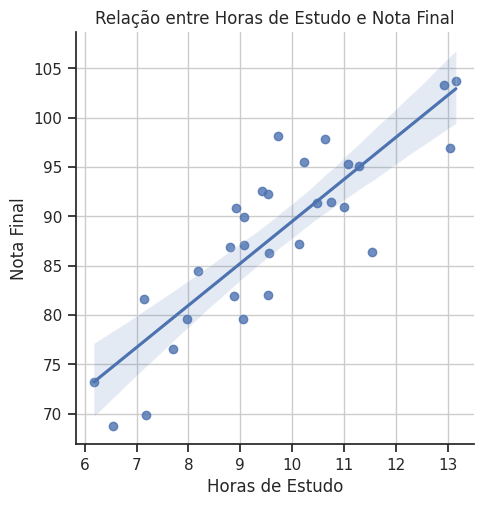

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Horas de Estudo', y='Nota Final', data=df)
plt.title('Relação entre Horas de Estudo e Nota Final')
plt.grid(True)
plt.show()

Plotando o gráfico com auxilio das bibliotecas seaborn e matplotlib por meio do código fornecido, fica evidente uma relação positiva entre as horas de estudo e a nota final.

### 1.3 Interpretação
 • O valor da correlação está mais próximo de 0, +1 ou–1? O que isso indica?

 • A covariância obtida é positiva ou negativa? O que isso significa no contexto?

 • Se a unidade da nota fosse alterada (ex: de 0–100 para 0–10), o valor da
 correlação mudaria? E a covariância?

In [ ]:
print(f"Covariância calculada: {cov}")
print(f"Correlação calculada: {corr}")

Covariância calculada: 13.788410270749694
Correlação calculada: 0.8556832738480706


Respondendo com base nos valores acima calculados no item 1.1  

- A correlação está mais próxima de +1. Isso indica uma forte correlação positiva. Ou seja, quanto mais horas de estudo alguém tem, maior será sua nota final, ou quanto menor a nota final, menos horas de estudo ela tem.
- Positiva. Significa que as variáveis tendem a aumentarem juntas, ou diminuirem juntas, mas sempre juntas, non mesmo sentido.
- Não a correlação não mudaria, já que ambas continuariam caminhando juntas na mesma proporção. A correlação de Pearson não é afetada pela escala. Agora, sobre a a covariância ela sofreria mudanças, tendo em vista que é afetada diretamente pela escala das variáveis.

###  1.4 Outras simulações
 • Gere um novo conjunto de dados em que a correlação entre horas_estudo
 e nota_final seja próxima de zero;

 • Gere um conjunto com correlação negativa entre as variáveis.

In [ ]:
np.random.seed(42)
horas_estudo = np.random.normal(10, 2, 30)
nota_final = np.random.normal(0, 5,30)
df = pd.DataFrame({
 'Horas de Estudo': horas_estudo,
 'Nota Final': nota_final})

corr = np.cov(df['Horas de Estudo'], df['Nota Final'], ddof=1)[0][1] / (np.std(df['Nota Final'], ddof=1) * np.std(df['Horas de Estudo'], ddof=1))
print(f"Correlação 1: {corr}")

horas_estudo = np.random.normal(10, 2, 30)
nota_final = 50 + -4 * horas_estudo + np.random.normal(0, 5,30)
df = pd.DataFrame({
 'Horas de Estudo': horas_estudo,
 'Nota Final': nota_final
})

corr = np.cov(df['Horas de Estudo'], df['Nota Final'], ddof=1)[0][1] / (np.std(df['Nota Final'], ddof=1) * np.std(df['Horas de Estudo'], ddof=1))
print(f"Correlação 2: {corr}")

Correlação 1: 0.09883379170949547
Correlação 2: -0.8857804123761401


Usando a função random.normal() da biblioteca numpy criamos uma amostra de tamanho 30 igual ao código fornecido, mas sem manipular o valor retornado para nota final usando as horas de estudo, deixando totalmente aleatório o resultado é próximo de 0

Para correlação negativa, novamente, o código fornecido para criar as amostras originais é modificado para ao invés das horas de estudo somarem a nota, subtraírem dela, o que cria uma correlação fortemente negativa.

#  2 Regressão Linear Múltipla
 Considere o conjunto de dados Auto4. O arquivo Auto.csv contém os dados para
 essa parte do trabalho. Esse arquivo está no repositório do curso. Leia o arquivo
 Auto.csv utilizando pd.read_csv('Auto.csv')

### (i) Produza uma matriz de gráfico de dispersão5 que inclua todas as variáveis no conjunto de dados.

In [ ]:
df = pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


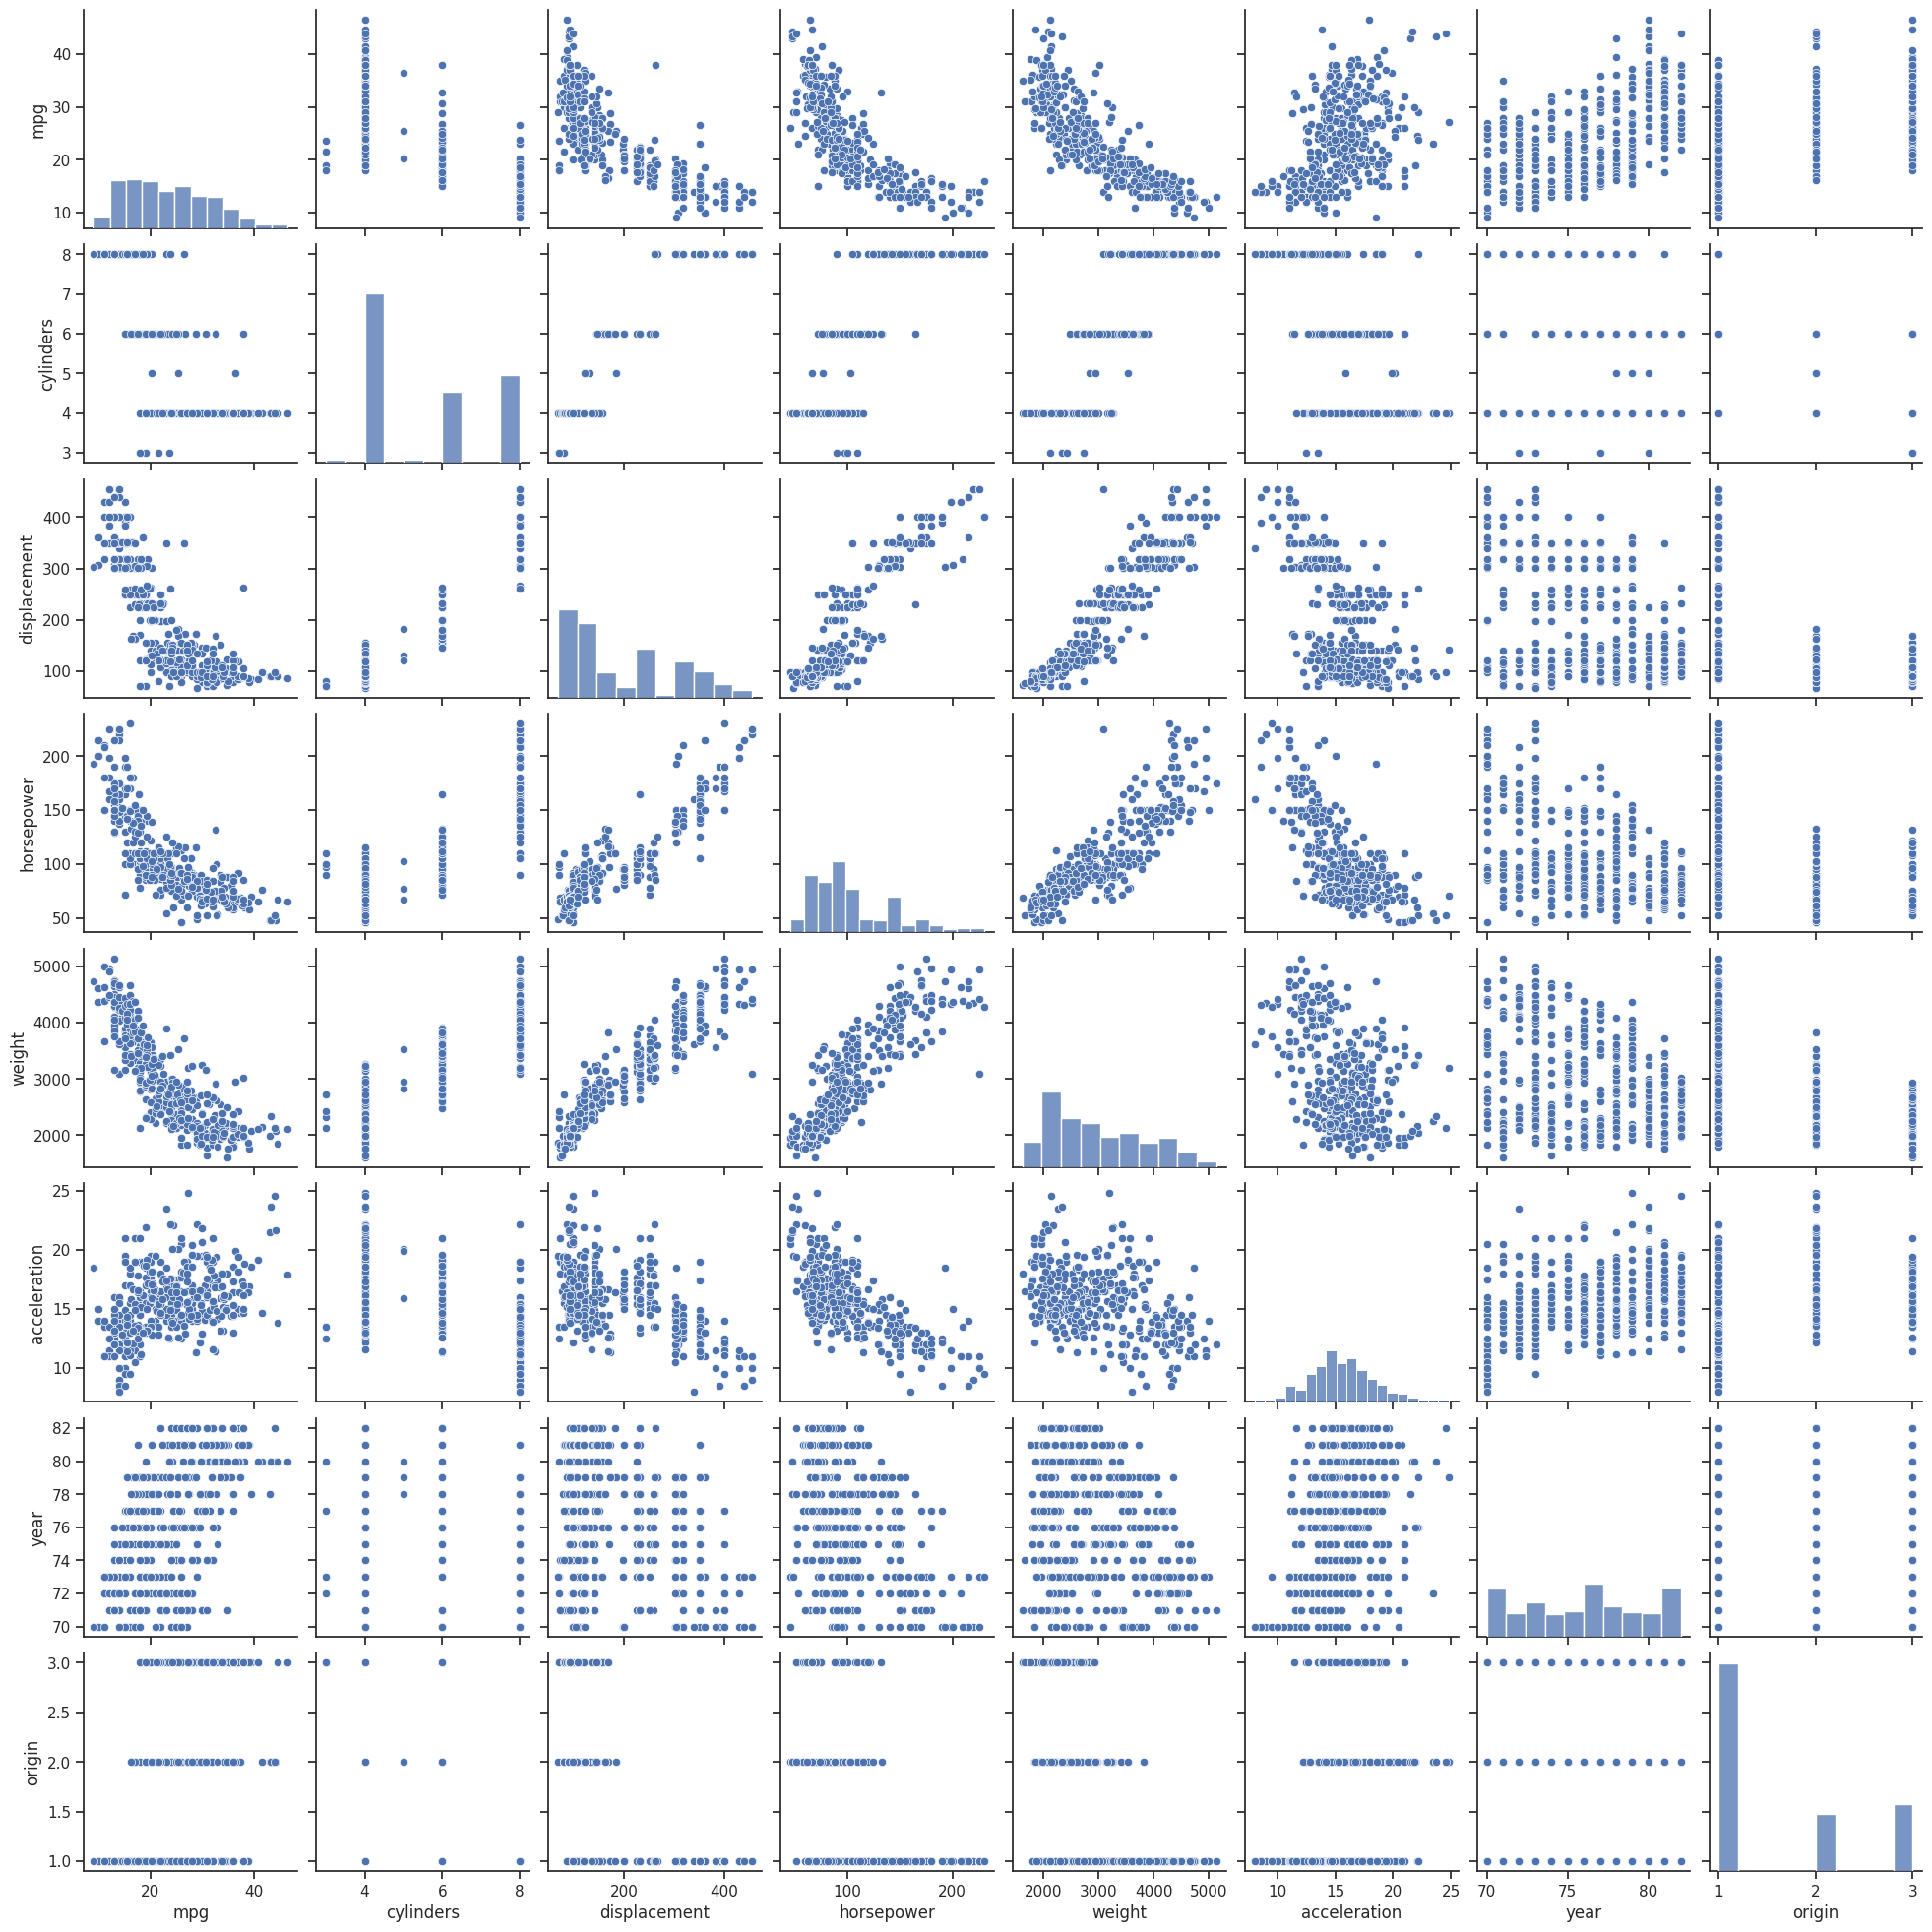

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df)

Foi criado o plot de dispersão de todas as variáveis conforme apontado o código na documentação da biblioteca seaborn do dataset fornecido

### (ii) Calcule a matriz de correlações entre as variáveis usando a função corr() do pandas.DataFrame. Você precisará excluir a variável name, que é qualitativa.

In [ ]:
df.drop(columns=['name'], inplace=True)
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


Tirando a coluna names com a função drop, calculamos as correlações para todas as variáveis com a função corr() que mostra uma tabela com a correlação associada a cada possibilidade.

###  (iii) Use a função statsmodels.api.OLS() para realizar uma regressão linear múltipla com mpg como resposta e todas as outras variáveis (exceto nome) como os preditores. Use a função summary() para imprimir os resultados. Comente sobre a saída. Por exemplo:
 (a) Existe uma relação entre os preditores e a resposta?

 (b) Quais preditores parecem ter um valor estatisticamente significativo
 com relação à resposta?

 (c) O que sugere o coeficiente correspondente à variável ano?

In [ ]:
import statsmodels.api as sm

Y = df['mpg']
X = df.drop(columns=['mpg'])
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 23 Nov 2025   Prob (F-statistic):          2.04e-139
Time:                        03:20:45   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

Usando a função OLS para calcular a regressão linear, podemos chegar as seguintes conclusões:

(a) Sim, há relação entre os preditores e a resposta, o que pode ser constatado pelo alto valor r-squared, que indica que as variáveis explicam bem a variação da variável prevista.

(b) Considerando o nível de significância de 5%, os valores mais significativos são os que tiveram p valor mais próximo de 0. São eles: displacement, weight, year e origin.

(c) Ele sugere que com o passar dos anos os carros tem se tornado mais eficiêntes. A cada aumento de 1 ano há o aumento de 0.75 em mpg

###  (iv) Use a função regplot6 da biblioteca seaborn para produzir gráficos residuais e de ajuste da regressão linear. Comente sobre quaisquer problemas que você encontrar com o ajuste.

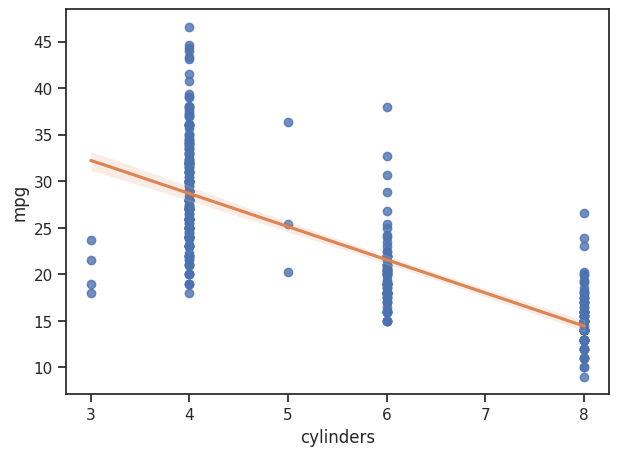

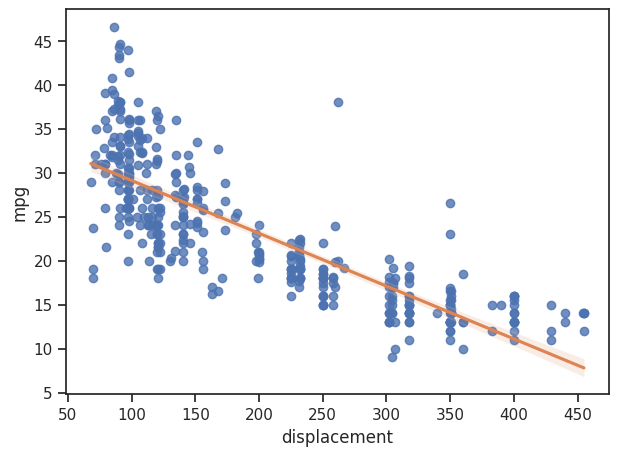

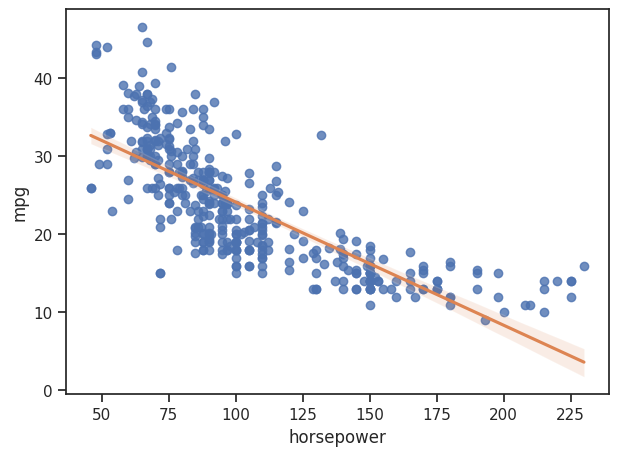

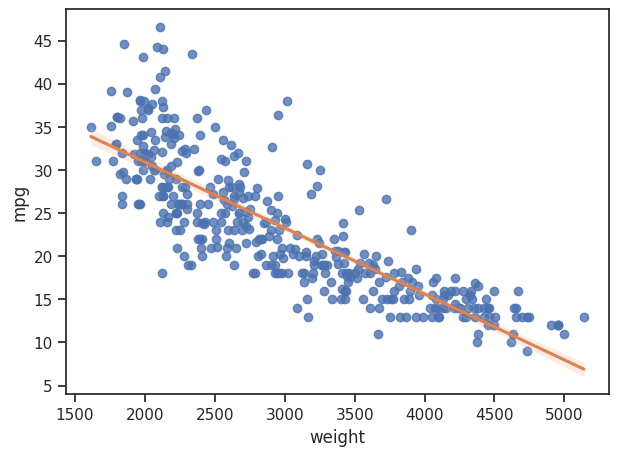

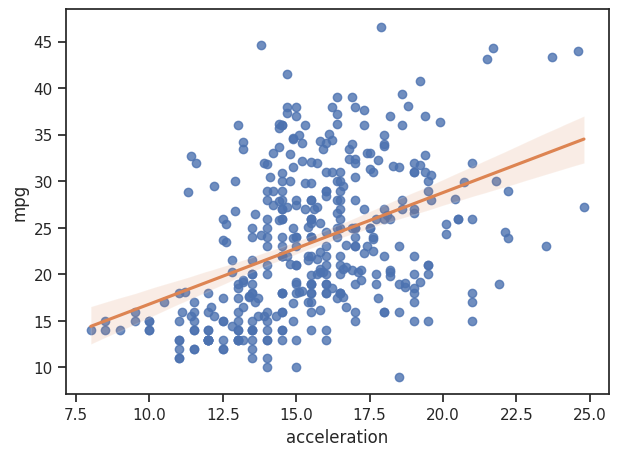

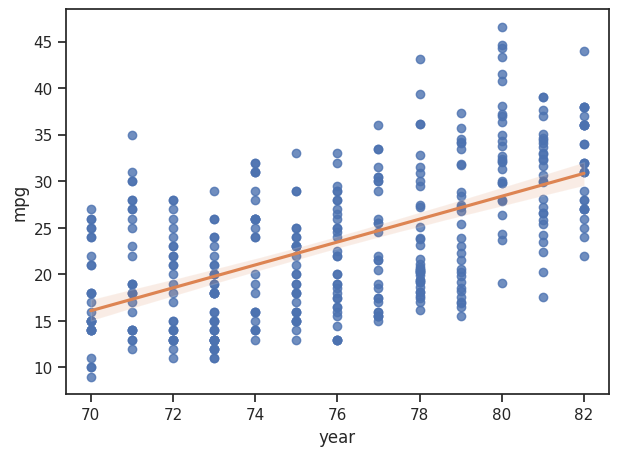

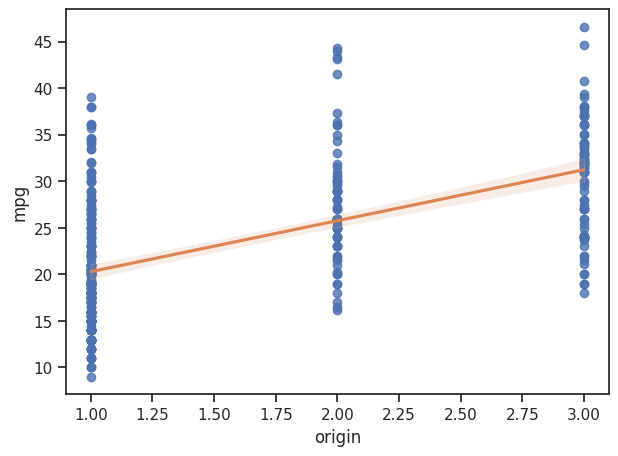

In [ ]:
for var in df.drop(columns=['mpg']).columns:
  plt.figure(figsize=(7, 5))
  sns.regplot(x=df[var], y=df['mpg'], line_kws={'color': 'C1'})
  plt.show()

Na biblioteca seaborn não é possível chamar uma função que mostre um modelo de regressão para todas as variáveis de uma vez, então foi usado um loop para iterar sobre o nome das colunas excluindo mpg para plotar um gráfico de acordo com a documentação fornecida. Sobre os gráficos gerados:

cylinders, displacement, horsepower e weight apresentam correlação negativa com alguns outliers.

origin e year apresentam correlação positiva.

acceleration não aparente ter relação com mpg.

#  3 DiD: Salário mínimo x taxa de empregos
Nesta parte, você irá replicar um estudo realizado originalmente por Card and Krueger [1994] sobre o efeito do aumento do salário mínimo sobre a taxa de empregos7. A teoria econômica convencional sugere que num mercado de trabalho com concorrência perfeita, um aumento no salário mínimo leva a um aumento no desemprego. Em abril de 1992, o estado americano de Nova Jersey (NJ) aumentou o salário mínimo (por hora) de US$ 4,25 para US$ 5,05. Card e Krueger (1994) utilizaram a técnica Difference-in-Difference (DiD) e mostraram que este aumento nos salários mínimos levou a um aumento no emprego no setor dos restaurantes de fast food. O grupo de controle utilizado nesse estudo foi o estado vizinho da Pensilvânia (PA), que não foi sujeito a essa mudança de política. Os autores realizaram uma pesquisa antes e depois do aumento do salário mínimo com uma amostra representativa de restaurantes de fast food em NJ e PA. Esta configuração pode ser considerada quase experimental, uma vez que ambos os estados não são idênticos em muitos aspectos e o processo legislativo, para aumentar o salário mínimo, não foi iniciado ao acaso. O arquivo card_krueger_1994_mod.csv contém os dados para essa parte do trabalho. Esse arquivo está na plataforma MS Teams.

### (i) Reproduza o gráfico apresentado na Figura 1 do estudo supra-mencionado.

/tmp/ipython-input-1315330798.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['wage_st'] = pd.cut(df_before['wage_st'], bins=limits, include_lowest=True, labels=labels)
/tmp/ipython-input-1315330798.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = df_before.groupby(['state', 'wage_st']).size().reset_index(name='Count')


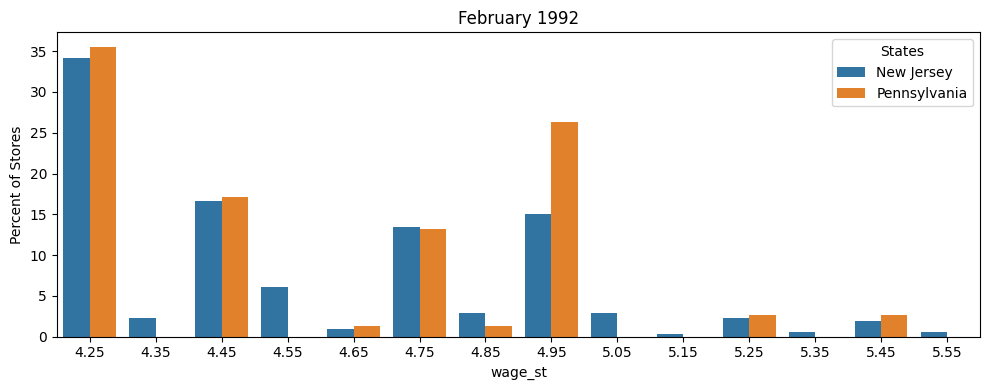

/tmp/ipython-input-1315330798.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after['wage_st'] = pd.cut(df_after['wage_st'],bins=limits,include_lowest=True,labels=labels)
/tmp/ipython-input-1315330798.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count = df_after.groupby(['state', 'wage_st']).size().reset_index(name='Count')


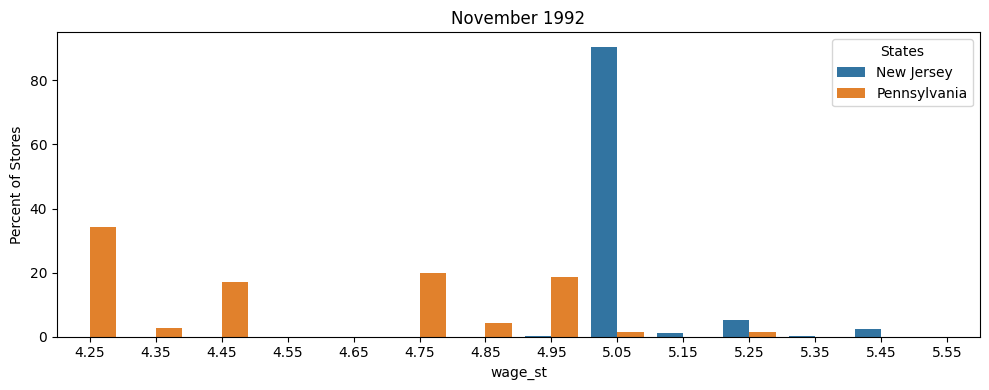

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('card_krueger_1994_mod.csv')

df = df[['state', 'observation', 'wage_st']].dropna()
df_before = df[df['observation'] == 'February 1992']
df_after = df[df['observation'] == 'November 1992']

limits = np.arange(4.25, 5.75, 0.10)
labels = [f'{i:.2f}' for i in limits[:-1]]
df_before['wage_st'] = pd.cut(df_before['wage_st'], bins=limits, include_lowest=True, labels=labels)

count = df_before.groupby(['state', 'wage_st']).size().reset_index(name='Count')
total = count.groupby('state')['Count'].transform('sum')
count['Percent_of_Stores'] = (count['Count'] / total) * 100

plt.figure(figsize=(10,4))
sns.barplot(x='wage_st', y='Percent_of_Stores', hue='state', data=count)
plt.title('February 1992')
plt.xlabel('wage_st')
plt.ylabel('Percent of Stores')
plt.legend(title='States')
plt.tight_layout()
plt.show()



df_after['wage_st'] = pd.cut(df_after['wage_st'],bins=limits,include_lowest=True,labels=labels)

count = df_after.groupby(['state', 'wage_st']).size().reset_index(name='Count')
total = count.groupby('state')['Count'].transform('sum')
count['Percent_of_Stores'] = (count['Count'] / total) * 100

plt.figure(figsize=(10,4))
sns.barplot(x='wage_st', y='Percent_of_Stores', hue='state', data=count)
plt.title('November 1992')
plt.xlabel('wage_st')
plt.ylabel('Percent of Stores')
plt.legend(title='States')
plt.tight_layout()
plt.show()

O gráfico é reproduzido ao separar em faixas de 0.10 o valor de wage_st que vão de 4.25 a 5.55, agrupando por estado e calculando a porcentagem total, para cada data da observação.

### (ii) Calcule a estimativa DiD usando a abordagem de computar a diferença das médias. Ou seja, neste item você não deve usar a statsmodels para realizar a regressão. Use apenas Python (ou R) para computar as médias da variável de interesse para os dois grupos, antes e depois da intervenção.

In [ ]:
df = pd.read_csv('card_krueger_1994_mod.csv')
df = df[['state', 'observation', 'emptot']].dropna()
mean_emp = df.groupby(['state','observation'])['emptot'].mean()
did = (mean_emp['New Jersey']['November 1992'] - mean_emp['New Jersey']['February 1992']) - (mean_emp['Pennsylvania']['November 1992'] - mean_emp['Pennsylvania']['February 1992'])
print(did)

2.753605782980582


###  (iii) Agora compute novamente a estimativa DiD, dessa vez utilizando a regres são linear. Para isso, você deve inicialmente criar duas variáveis dummy. Um indica o início do tratamento (tempo) e é igual a zero antes do tratamento e igual a um após o tratamento. A outra variável separa as observações em grupo de tratamento e grupo controle (tratado). Essa segunda variável dummy é igual a 1 para restaurantes fast food localizados em NJ e igual a 0 para restaurantes fast food localizados no PA. Em seguida, crie a variável de interação multiplicativa.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('card_krueger_1994_mod.csv')
df = df[['state', 'observation', 'emptot']].dropna()
df['time'] = df['observation'].map({'February 1992': 0, 'November 1992': 1})
df['treat'] = df['state'].map({'New Jersey': 1, 'Pennsylvania': 0})

df['interac'] = df['time'] * df['treat']

Nesse trecho de código usamos a função map para mapear atribuir os valores zeros e uns corretamente às variáveis propostas. Por fim, o resultado das duas colunas é multiplicado para gerar a variável de interação.

### (iv) Finalmente, use a biblioteca statsmodels para gerar o modelo de regressão linear. Certifique-se de incluir um intercepto no modelo (por exemplo, usando sm.add_constant). Apresente sua análise e interpretação do resultado obtido.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = df[['time', 'treat', 'interac']]
X = sm.add_constant(X)
Y = df['emptot']

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 emptot   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.964
Date:                Mon, 24 Nov 2025   Prob (F-statistic):              0.118
Time:                        02:00:11   Log-Likelihood:                -2904.2
No. Observations:                 794   AIC:                             5816.
Df Residuals:                     790   BIC:                             5835.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3312      1.072     21.767      0.0

Com o modelo gerado podemos perceber que ele não explica quase nada da taxa de emprego, com valor r-squared de apenas 0.007. Além disso, o p valor das variáveis é muito alto, com a maioria acima do nível de significância de 5% e nenhuma abaixo de 1%. Ou seja, o modelo não é uma boa predição para a taxa de emprego.

#  4 DiD: validação
 A validade da abordagem diferença-em-diferenças baseia-se na suposição de que
 há tendências iguais (equal trends) nos grupos de controle e de tratamento. De
 acordo com essa suposição, na ausência da intervenção (programa, tratamento),
 não existiriam diferenças variáveis no tempo entre os grupos de tratamento e de
 controle. Embora esta suposição não possa ser provada, sua validade pode ser
 avaliada de quatro maneiras:

  1. Comparar repetidamente as mudanças nos resultados dos grupos de tratamento e controle antes de o programa ser implementado (ou seja, em t-3, t-2, t-1). Se a tendência dos resultados se mover em paralelo antes do início do programa, teria provavelmente continuado a mover-se em conjunto na
 ausência do programa.
 2. Fazer um teste de placebo usando um grupo de tratamento falso. O grupo de tratamento falso deveria ser um grupo que não foi afetado pelo programa. Um teste placebo que revela impacto zero apoia a suposição de tendência igual.
 3. Fazer um teste de placebo usando um resultado falso. Um teste placebo que revela impacto zero apoia a suposição de tendência igual.
 4. Executar a estimativa de diferenças em diferenças usando diferentes grupos de comparação. Estimativas semelhantes do impacto do programa confirmam a suposição de tendência igual.

 Sua tarefa nesta parte do trabalho é revisitar o conjunto de dados denominado Panel101.dta, que foi usado no exercício realizado em aula. Ao realizar esse exercício, dividimos os países em dois grupos (controle e tratamento) usando o ano 1994 como ponto no tempo em que houve a intervenção. Use apenas as observações correspondentes aos anos anteriores a 1994 para realizar o teste de validação descrito no item 1 acima.


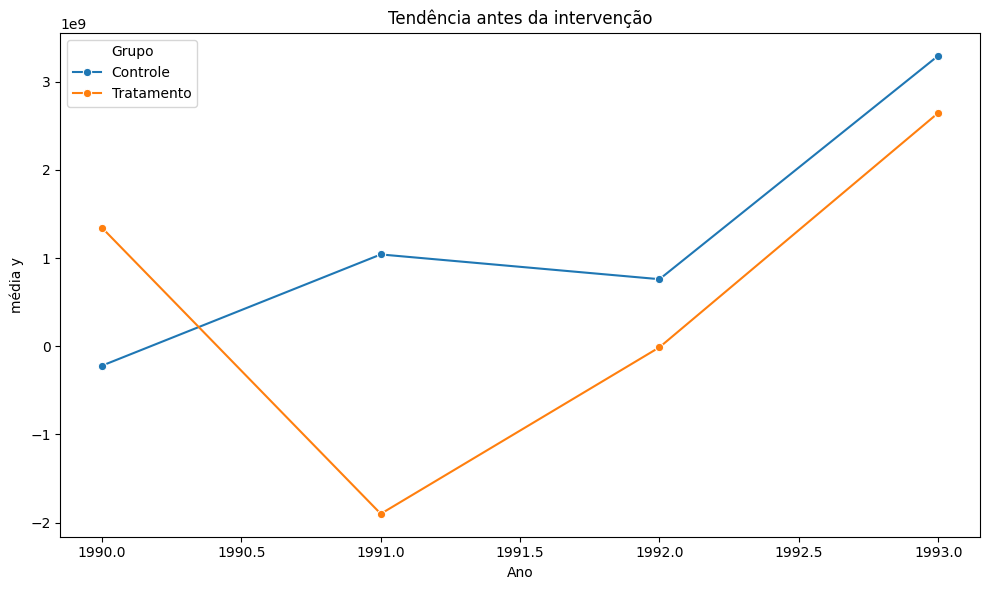

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_stata("Panel101.dta")

df = df[df['year'] < 1994]

control = df[df['country'] != 'A']
treat = df[df['country'] == 'A']

mean_control = control.groupby('year')['y'].mean().reset_index()
mean_treat = treat.groupby('year')['y'].mean().reset_index()

mean_control['Grupo'] = 'Controle'
mean_treat['Grupo'] = "Tratamento"

df = pd.concat([mean_control, mean_treat])

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='y', hue='Grupo', data=df, marker='o')
plt.title('Tendência antes da intervenção')
plt.xlabel('Ano')
plt.ylabel('média y')
plt.tight_layout()
plt.show()

Ao plotar as médias do grupo de controle e do que sofreu a intervenção percebe-se que os dois grupos não caminham juntos paralelamente, com um decaindo muito enquanto o outro sobe ao decorrer do primeiro ano e em seguinte esse mesmo sobe bastante com o outro se mantendo praticamente igual. Isso pode indicar que os grupos não não equivalentes para averiguar uma diferença após a intervenção.

#  5 Consumo de álcool x taxa de mortalidade
 As estatísticas relacionadas com o efeito do consumo de álcool são preocupantes, desde as elevadas taxas de mortalidade por acidentes de trânsito até problemas de saúde, especialmente entre os jovens adultos. Nesta parte, você irá replicar um estudo realizado por Carpenter and Dobkin [2009] sobre o efeito do consumo de álcool nas taxas de mortalidade8. Os dados a serem usados
 podem ser obtidos em http://masteringmetrics.com/wp-content/uploads/2015/01/AEJfigs.dta. A Tabela 1 descreve as colunas desse conjunto de dados.

 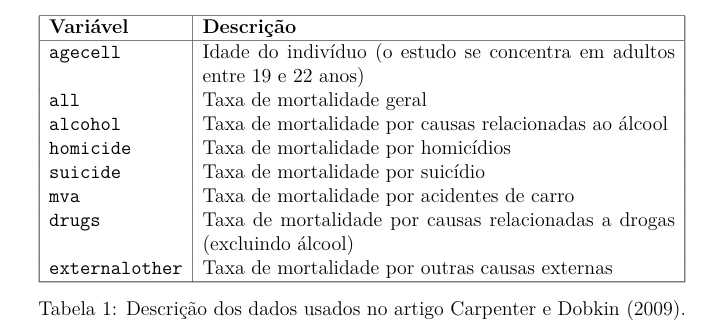

  A descontinuidade de regressão é um desenho apropriado para estudar estas
 questões, uma vez que os jovens adultos são “naturalmente” selecionados em dois
 grupos com base na sua idade: os jovens adultos com menos de 21 anos não estão
 legalmente autorizados a beber, enquanto os jovens adultos com mais de 21 anos
 são legalmente autorizados a beber. Podemos comparar a taxa de mortalidade
 entre esses dois grupos.

###  (i) Reproduza o gráfico apresentado na Figura 3 do estudo acima mencionado.

In [1]:
import pandas as pd

df = pd.read_stata('AEJfigs.dta')
df.head()

,agecell,all,allfitted,internal,internalfitted,external,externalfitted,alcohol,alcoholfitted,homicide,homicidefitted,suicide,suicidefitted,mva,mvafitted,drugs,drugsfitted,externalother,externalotherfitted
0,19.068493,92.825401,91.706146,16.617590,16.738131,76.207817,74.968010,0.639138,0.794344,16.316818,16.284573,11.203714,11.592100,35.829327,34.817780,3.872425,3.448835,8.534373,8.388236
1,19.150684,95.100739,91.883720,18.327684,16.920654,76.773056,74.963066,0.677409,0.837575,16.859964,16.270697,12.193368,11.593611,35.639256,34.633888,3.236511,3.470022,8.655786,8.530174
2,19.232876,92.144295,92.049065,18.911053,17.098843,73.233238,74.950226,0.866443,0.877835,15.219254,16.262882,11.715812,11.595129,34.205650,34.446735,3.202071,3.492069,8.513741,8.662681
3,19.315069,88.427757,92.202141,16.101770,17.272680,72.325981,74.929466,0.867308,0.915115,16.742825,16.261148,11.275010,11.596655,32.278957,34.256302,3.280689,3.514980,8.258285,8.785728
4,19.397261,88.704941,92.342918,17.363520,17.442156,71.341415,74.900757,1.019163,0.949407,14.947726,16.265511,10.984314,11.598189,32.650967,34.062588,3.548198,3.538755,8.417533,8.899288


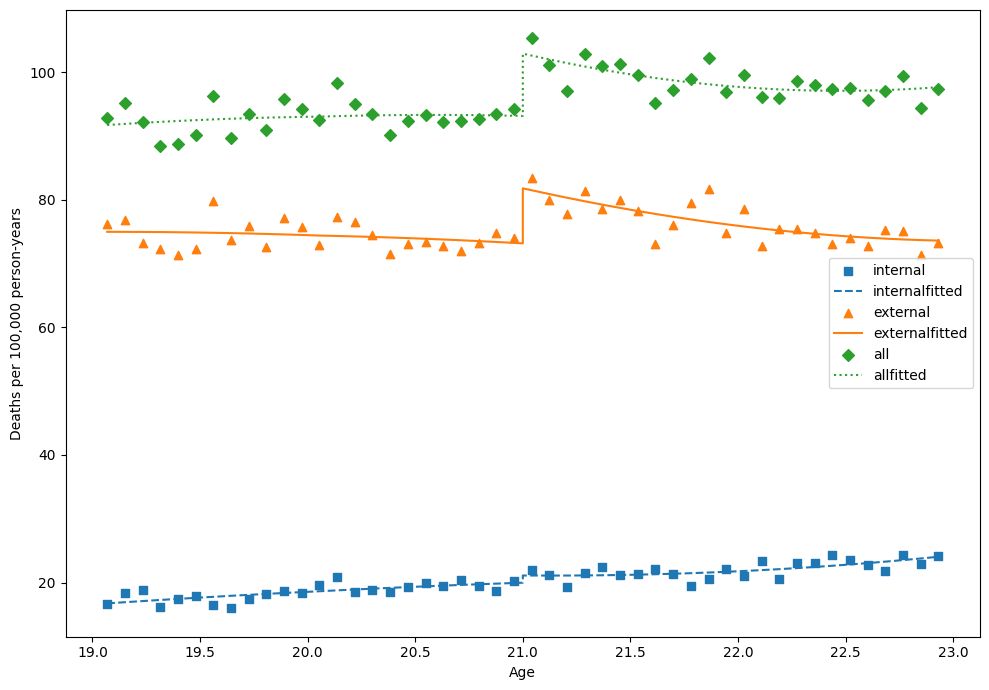

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(x=df['agecell'], y=df['internal'], marker='s', label='internal')
plt.plot(df['agecell'], df['internalfitted'], linestyle='--', label='internalfitted')
plt.scatter(x=df['agecell'], y=df['external'], marker='^', label='external')
plt.plot(df['agecell'], df['externalfitted'], linestyle='-', label='externalfitted')
plt.scatter(x=df['agecell'], y=df['all'], marker='D', label='all')
plt.plot(df['agecell'], df['allfitted'], linestyle=':', label='allfitted')
plt.xlabel("Age")
plt.ylabel("Deaths per 100,000 person-years")
plt.legend()
plt.tight_layout()
plt.show()

Foi usado a função scatter da biblioteca matplotlib para criar os pontos da observação do gráfico para cada um dos grupos, então foi usado um simples plot para mostrar a linha de regressão para cada um deles.

 ### (ii) “Execute uma regressão descontínua (RDD) tendo como variável dependente all e como variável de corte a idade (agecell). Analise os resultados. Como você usa esses resultados para estimar a relação entre consumo de álcool e mortalidade? Nota: O conjunto de dados fornecido possui menos do que 50 observações. Sendo assim, não espere reproduzir exatamente os resultados das tabelas do artigo, que usa um conjunto de dados completo de 1.500 observações. Além disso, você também não tem as mesmas variáveis.

In [6]:
import statsmodels.formula.api as smf

df['elder'] = df["agecell"] >= 21
df['age_c'] = df["agecell"] - 21

model = smf.ols("all ~ elder + age_c", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     32.99
Date:                Sat, 20 Dec 2025   Prob (F-statistic):           1.51e-09
Time:                        16:48:08   Log-Likelihood:                -110.41
No. Observations:                  48   AIC:                             226.8
Df Residuals:                      45   BIC:                             232.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        91.8414      0.805    114.083

Implementando a regressão descontínua para previsão da taxa de mortalidade geral no código acima usando a função smf.ols da biblioteca statsmodel, percebemos que há o aumento na taxa de mortalidade após a liberação do consumo do alcóol, representado pelo coeficiente de ~7.7 que é significativo pelo seu p valor próximo a zero.

### (iii) Produza o gráfico todas as variáveis por idade e adicione as linhas de regressão definidas pelo resultado da regressão (não há problema se as linhas se estenderem por toda a figura. O gráfico que você deve produzir aqui deve ser semelhante ao apresentado na Figura 2.

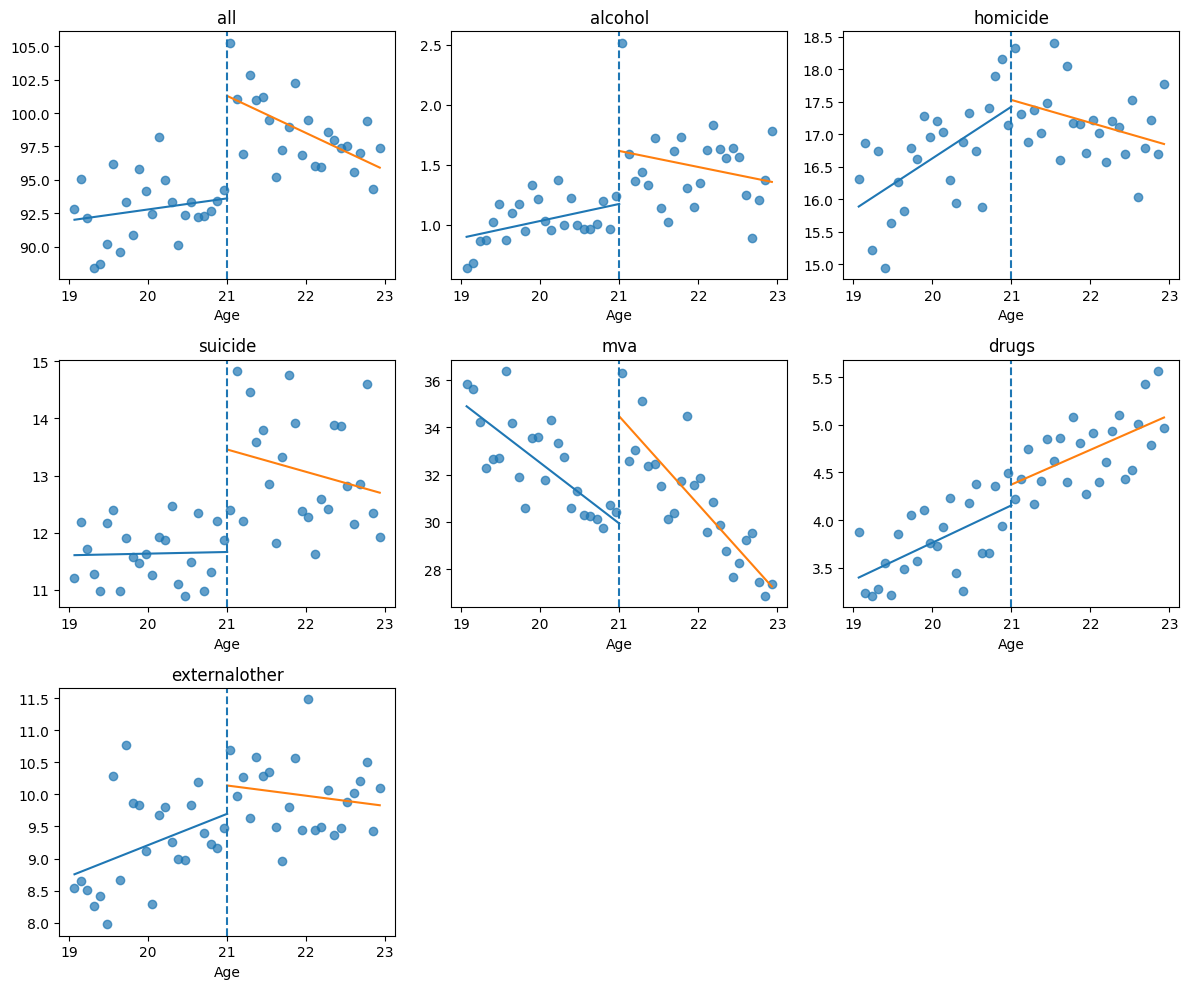

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

vars = [
    "all", "alcohol", "homicide",
    "suicide", "mva", "drugs", "externalother"
]
cut = 21

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(vars):
    ax = axes[i]

    left = df[df["agecell"] < cut]
    right = df[df["agecell"] >= cut]

    m_left = smf.ols(f"{var} ~ agecell", data=left).fit()
    m_right = smf.ols(f"{var} ~ agecell", data=right).fit()

    x_left = np.linspace(left["agecell"].min(), cut, 100)
    x_right = np.linspace(cut, right["agecell"].max(), 100)

    y_left = (m_left.params["Intercept"] + m_left.params["agecell"] * x_left)
    y_right = ( m_right.params["Intercept"] + m_right.params["agecell"] * x_right)

    ax.scatter(df["agecell"], df[var], alpha=0.7)
    ax.plot(x_left, y_left)
    ax.plot(x_right, y_right)
    ax.axvline(cut, linestyle="--")

    ax.set_title(var)
    ax.set_xlabel("Age")
    ax.set_ylabel("")


# Remover subplots vazios
for j in range(len(vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Treinando o modelo de regressão descontinua para cada variável, plotamos um scatter plot para cada um com a linha de regressão e divisão sinalizada por uma linha vertical na idade 21